In [1]:
!pip install torch bitsandbytes transformers accelerate

Defaulting to user installation because normal site-packages is not writeable


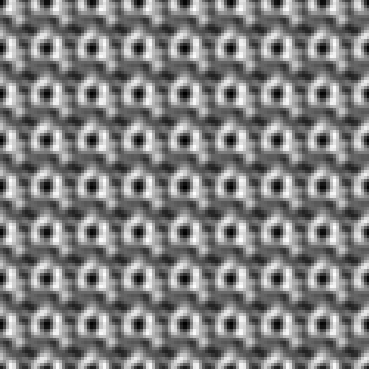

In [2]:
from PIL import Image
from IPython.display import display

image = Image.open('prism_output_images/mp-1265/mp-1265_0_1_0_angle_45_100nm_combo_3_ABF.tiff')
display(image)

In [3]:
import torch
from transformers import BitsAndBytesConfig

# quantization_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_compute_dtype=torch.float16
# )

In [4]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id)

/people/chen541/.local/lib/python3.11/site-packages/transformers/models/llava/configuration_llava.py:100: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [5]:
max_new_tokens = 200
prompt = "USER: <image>\nWhat do you think this image shows if I tell you it's science related?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


In [6]:
print(outputs[0]["generated_text"])

USER:  
What do you think this image shows if I tell you it's science related?
ASSISTANT: If you tell me that the image is science-related, I would interpret it as a close-up of a microscope slide with a pattern of holes or pores. The holes or pores could be the result of a biological process, such as the growth of fungi or the development of a plant. The image might be used to study the structure, growth, or behavior of the organisms involved in the process.
